# Analysing evaluation results from reward experiment

In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-18_12_59__alpha_0/",

                            "reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-19_19_25__alpha_0.25/",

                            "reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-20_16_34__alpha_0.5/",
    
                            "reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-22_20_23__alpha_0.75/",

                            "reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-22_08_37__alpha_1/",
                            
                            "reward_experiments/2x2grid/combined_reward_with_delta_wait/EVALUATION/PPO_2024-04-30_10_51__alpha_0.2"]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.abspath(x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''
    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0",
                                    seed = seed)
    trained_0_25_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_25",
                                    seed = seed)
    trained_0_5_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_5",
                                    seed = seed)
    trained_0_75_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_75",
                                    seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_1",
                                    seed = seed)
    trained_0_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_2",
                                    seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df, trained_0_df, trained_0_2_df, trained_0_25_df, trained_0_5_df, trained_0_75_df, trained_1_df], axis=0)

    return alpha_experiment_df

In [4]:
alpha_experiment_df_39 = concaten_summary_for_specific_seed(39)
alpha_experiment_df_49 = concaten_summary_for_specific_seed(49)
alpha_experiment_df_83 = concaten_summary_for_specific_seed(83)
alpha_experiment_df_51 = concaten_summary_for_specific_seed(51)
alpha_experiment_df_74 = concaten_summary_for_specific_seed(74)
alpha_experiment_df_10 = concaten_summary_for_specific_seed(10)
alpha_experiment_df_15 = concaten_summary_for_specific_seed(15)
alpha_experiment_df_22 = concaten_summary_for_specific_seed(22)
alpha_experiment_df_31 = concaten_summary_for_specific_seed(31)
alpha_experiment_df_55 = concaten_summary_for_specific_seed(55)

# alpha_dfs = [alpha_experiment_df_39, alpha_experiment_df_49, alpha_experiment_df_51, alpha_experiment_df_74, alpha_experiment_df_83]

alpha_dfs = [alpha_experiment_df_39, alpha_experiment_df_49, alpha_experiment_df_51, alpha_experiment_df_74, alpha_experiment_df_83, \
             alpha_experiment_df_10, alpha_experiment_df_15, alpha_experiment_df_22, alpha_experiment_df_31, alpha_experiment_df_55]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,16.731464,18.307986,55.251485,83657.321876,83647.460721,335.182334,6.390759,13.912224,0.000000,13.912224,6.879003,4.894585,10.6150,217.1164,13.552442,11.814331,10.6150,53075.0,246.6716
alpha_0,0.341177,1.704376,2.789052,1705.886630,1705.886630,2.904896,0.119657,13.912224,0.000000,13.912224,0.000000,0.756747,73.6658,151113.8486,1.651897,0.320945,73.6658,368329.0,65399.1828
alpha_0_2,10.301078,13.665801,80.658043,51505.388242,51505.388242,186.754112,0.748528,13.912224,0.000000,13.912224,0.601599,1.089517,66.6248,6181.6782,11.987712,8.786257,66.6248,333124.0,22324.7174
alpha_0_25,17.194718,21.717964,176.046832,85973.591374,85968.254319,471.669959,1.502176,13.912224,0.000000,13.912224,1.352845,1.167214,56.6566,3369.8692,18.712626,14.255532,56.6566,283283.0,11990.8964
alpha_0_5,18.999115,22.271236,135.068596,94995.576848,94989.093953,496.007967,2.008704,13.912224,0.000000,13.912224,1.921048,1.463422,41.2860,1262.2840,18.970719,15.527964,41.2860,206430.0,6078.8556
alpha_0_75,21.717886,23.832209,96.326878,108589.427572,108570.543104,567.974164,3.144036,13.912224,0.636265,13.275959,3.036090,1.315914,27.0048,514.1178,19.292603,17.063455,27.0048,135024.0,2759.2132
alpha_1,18.991893,20.588418,63.203612,94959.465222,94953.344541,423.882972,5.215398,14.087909,1.542101,12.545808,5.224086,1.328605,13.2158,187.4106,15.654716,14.049017,13.2158,66079.0,1111.7918
fixed_tc,16.888961,18.460455,55.562520,84444.805544,84434.599210,340.788414,6.371262,13.224184,0.000000,13.224184,6.767880,5.093370,10.7838,222.0246,13.731615,11.986335,10.7838,53919.0,252.3430
alpha_0,0.353468,1.839671,3.260100,1767.338157,1767.338157,3.384388,0.097831,13.090883,0.000000,13.090883,0.000000,0.653786,74.3832,153772.0498,1.781502,0.330203,74.3832,371916.0,66050.1320
alpha_0_2,16.001852,20.439718,161.755163,80009.258519,80009.146230,417.782070,0.882504,13.090883,0.000000,13.090883,0.785704,1.034200,74.8530,5820.9734,18.065502,13.805463,74.8530,374265.0,19294.8150


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0,0.348383,1.788434,3.084171,1741.915548,1741.915548,3.205091,0.096086,13.945391,0.000000,13.945391,0.000000,0.657258,74.31598,153781.16620,1.734180,0.326103,74.31598,371579.9,65977.98052
alpha_0_2,12.088885,15.767572,105.754486,60444.424810,60441.390122,257.344950,0.782835,13.945391,0.000000,13.945391,0.676137,1.033656,68.61982,6159.13994,13.875532,10.345596,68.61982,343099.1,21392.78154
alpha_0_25,14.847323,18.869851,136.863048,74236.616745,74233.383114,359.667482,1.528757,13.945391,0.000004,13.945387,1.392417,1.061495,52.04326,3261.53402,16.080564,12.091026,52.04326,260216.3,12204.63242
alpha_0_5,19.285133,22.416394,130.615501,96425.667304,96422.760418,502.733166,2.021569,13.945391,0.004789,13.940602,1.934299,1.187952,41.69592,1235.98154,19.087712,15.768678,41.69592,208479.6,6150.99688
alpha_0_75,22.397304,24.334811,90.558510,111986.518624,111976.289196,592.439800,3.155452,13.945391,0.252205,13.693186,3.108392,1.200035,27.37586,520.02700,19.651292,17.599957,27.37586,136879.3,2782.58866
alpha_1,19.041096,20.573691,60.724327,95205.478219,95195.938053,423.383396,5.155856,13.966287,0.669846,13.296441,5.154472,1.277401,13.39092,189.40464,15.664569,14.111136,13.39092,66954.6,1152.81236
fixed_tc,16.877811,18.503922,57.562304,84389.056214,84376.659192,342.624088,6.336759,13.958721,0.068022,13.890699,6.733158,5.096454,11.04608,227.54018,13.776534,12.006749,11.04608,55230.4,259.93018


## Difference between trained and fixed_tc eval for alpha = 0.25, seed 39

In [6]:
fixed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], "fixed_tc", seed = 39)
trained_39_alpha_0_25 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], "trained", seed = 39)

In [7]:
diff = np.square(trained_39_alpha_0_25['system_abs_accel'] - fixed_39['system_abs_accel'])

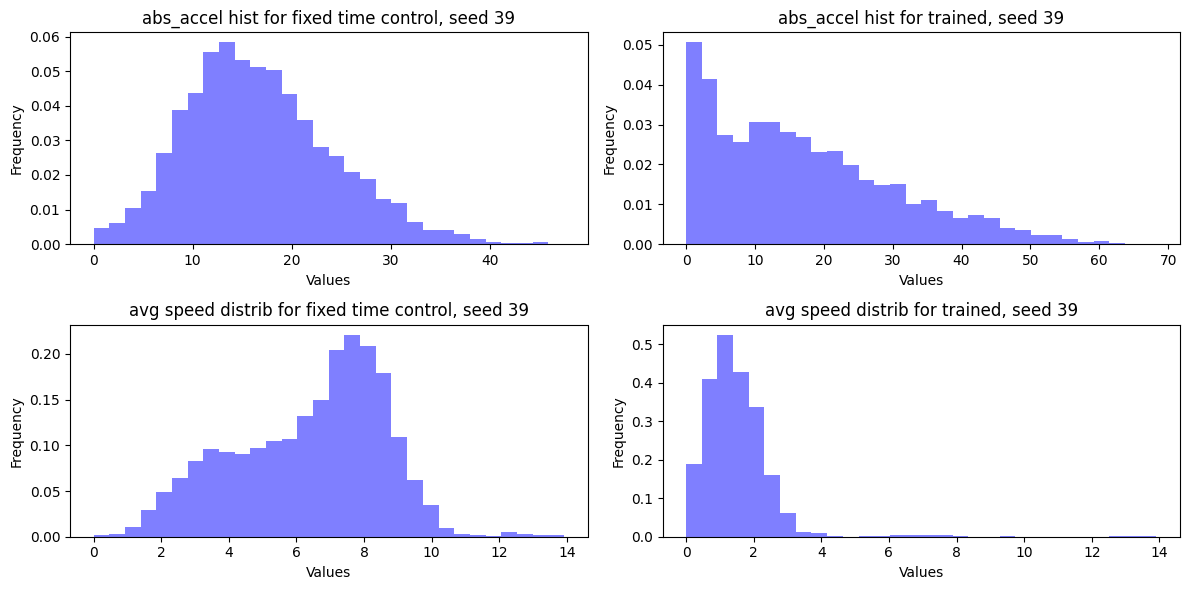

In [8]:
import matplotlib.pyplot as plt

fixed_39_abs_acc = fixed_39['system_abs_accel']
trained_39_abs_acc = trained_39_alpha_0_25['system_abs_accel']

fixed_39_speeds = fixed_39['sys_avg_speed']
trained_39_speeds = trained_39_alpha_0_25['sys_avg_speed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

# Plot on first subplot
axes[0,0].hist(fixed_39_abs_acc, bins=30, density=True, alpha=0.5, color='blue')
axes[0,0].set_title('abs_accel hist for fixed time control, seed 39')
axes[0,0].set_xlabel('Values')
axes[0,0].set_ylabel('Frequency')

# Plot on second subplot
axes[0,1].hist(trained_39_abs_acc, bins=30, density=True, alpha=0.5, color='blue')
axes[0,1].set_title('abs_accel hist for trained, seed 39')
axes[0,1].set_xlabel('Values')
axes[0,1].set_ylabel('Frequency')

# Plot on first subplot
axes[1,0].hist(fixed_39_speeds, bins=30, density=True, alpha=0.5, color='blue')
axes[1,0].set_title('avg speed distrib for fixed time control, seed 39')
axes[1,0].set_xlabel('Values')
axes[1,0].set_ylabel('Frequency')

# Plot on second subplot
axes[1,1].hist(trained_39_speeds, bins=30, density=True, alpha=0.5, color='blue')
axes[1,1].set_title('avg speed distrib for trained, seed 39')
axes[1,1].set_xlabel('Values')
axes[1,1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [9]:
import scipy.stats as stats

# Perform the two-sample K-S test
stat, p = stats.ks_2samp(trained_39_alpha_0_25['system_abs_accel'], fixed_39['system_abs_accel'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The two datasets are from the same distribution (fail to reject H0).')
else:
    print('The two datasets are from different distributions (reject H0).')

Statistics=0.204, p=0.000
The two datasets are from different distributions (reject H0).
